# Exercises

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**EXERCISE 1: Climate Change and Sea Ice Extent**<p>

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org).<p>

We perform the following processing steps:

</li>
<ol>
<ul>
</ul>
<li> We must read and clean the data.
<li> To compute the tendency for a given interval of time (month), we need to normalize the data.
<li> This values can be plotted for the entire time series or for particular months.
<li> We can compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.
<li> We can also estimate the extent value for 2025.

</ol>
</div>

In [ ]:
import os
os.getcwd()

'/content'

In [4]:
from google.colab import files
uploaded = files.upload()

Saving SeaIce.txt to SeaIce.txt


In [5]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('SeaIce.txt',delim_whitespace=True)
print('shape: {}'.format(ice.shape))
ice.head()

shape: (424, 6)


<ipython-input-5-724fad77c4f9>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ice = pd.read_csv('SeaIce.txt',delim_whitespace=True)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend), before data cleaning.

In [8]:
# filter for interval of time
ref_period = ice[(ice['year'] >= 1981) & (ice['year'] <= 2010)]

# monthly means for interval of time
monthly_means = ref_period.groupby('mo')['extent'].mean()

# calculate anomaly: difference to monthly mean in interval
ice['Anomaly'] = ice.apply(lambda row: row['extent'] - monthly_means.loc[row['mo']], axis=1)



## Visualization

### The importance of plotting

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties.

<center><img src="./images/Anscombe's_quartet_3.svg"  width="600"></center>

Source [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).



### Example 1: Housing Data

We'll continue with our Boston housing dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
from pandas import read_csv
import pandas as pd
import matplotlib.pylab as plt


#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df_boston['PRICE'] = df_boston['MEDV']

### Histograms

Text(0, 0.5, 'count')

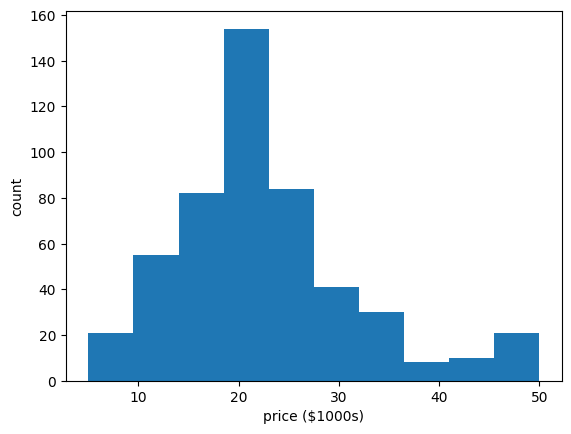

In [ ]:
# Histogram of prices:
plt.hist(df_boston.PRICE)
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Linear Regression Visualization: Seaborn lmplot

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

We will use the variable price as our response $\textbf{y}$ and LSTAT as our predictor $\textbf{x}$.


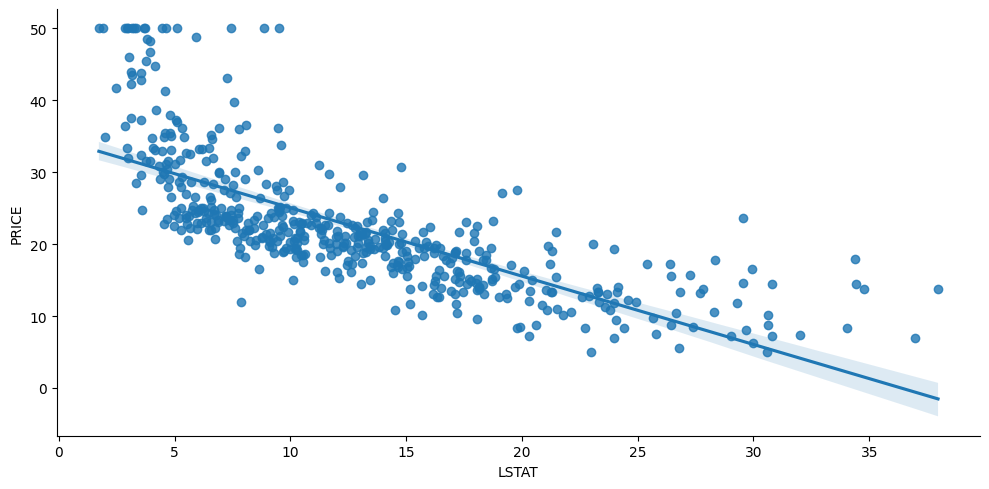

In [ ]:
import seaborn as sns
# Visualization of the relations between price and LSTAT
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2);

lmplot has two main components.

+ The first is a scatterplot, showing the observed datapoints.
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model (using Bootstraping).

Is the relationship between the house price and ``lstat`` non-linear? Is the straight line a poor fit? Maybe a better fit can be obtained by including higher order terms:

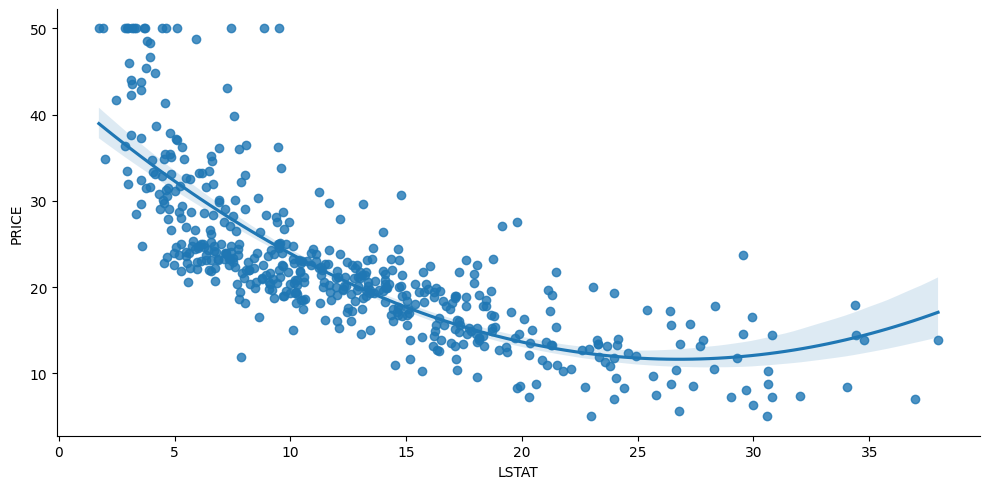

In [ ]:
# Estimate a polynomial regression of order 2
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=2);

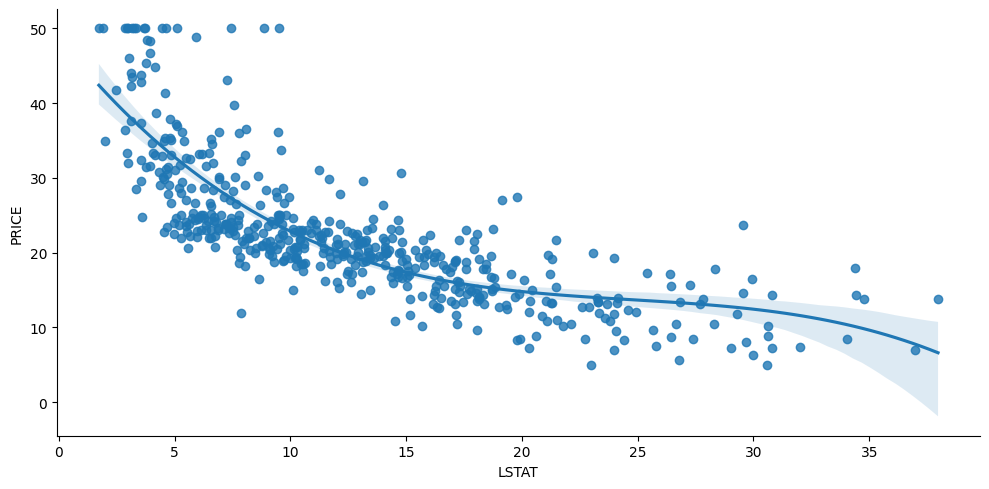

In [ ]:
# Estimate a polynomial regression of order 3
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=3);


What if we consider variable RM or AGE?

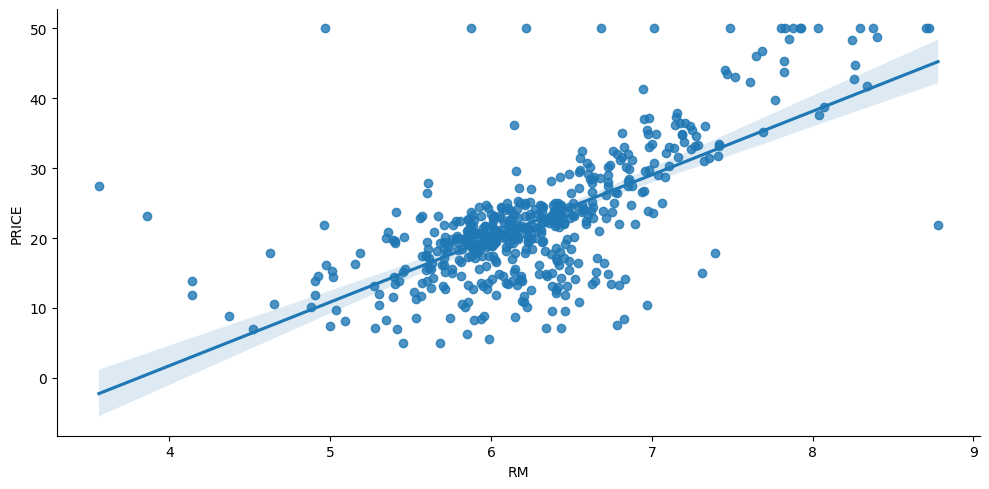

In [ ]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot(x="RM", y="PRICE", data=df_boston, aspect=2);

In [ ]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

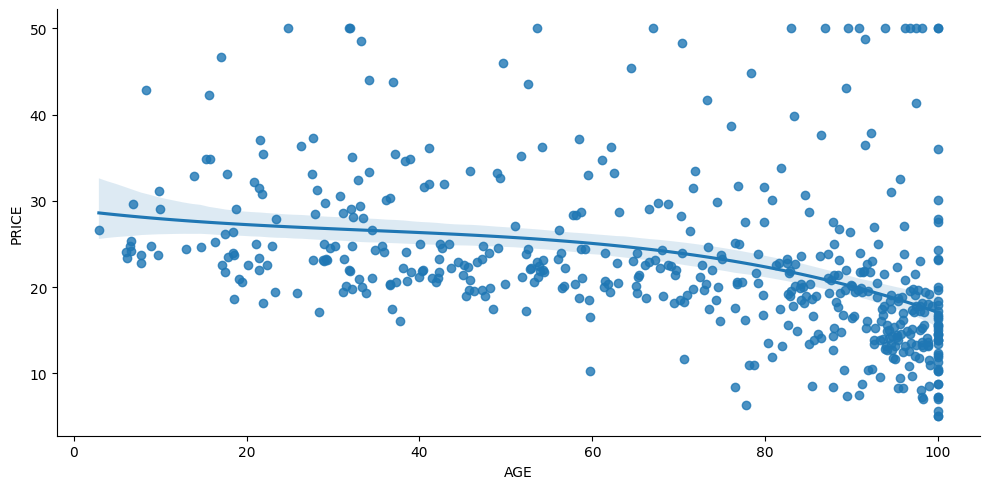

In [ ]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

### Heatmap

We can also use corr function from Pandas and heatmap function from Seaborn for studying the variables relationship, plotting a diagonal correlation matrix.

<Axes: >

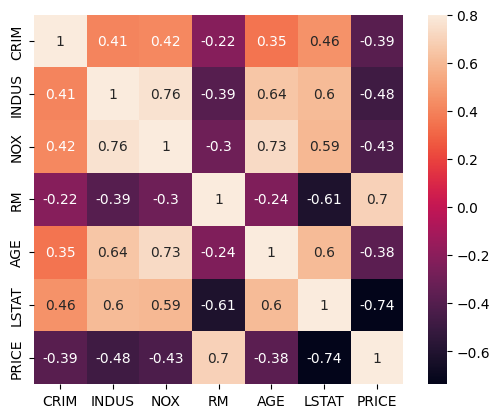

In [ ]:
features2 = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE'] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = df_boston[features2]
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Scatter plot matrix

Let's explore multiple variables relationships using a scatter plot matrix. The scatter plot is a grid of plots of multiple varaibles one against the other, showing the pairwise relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables:

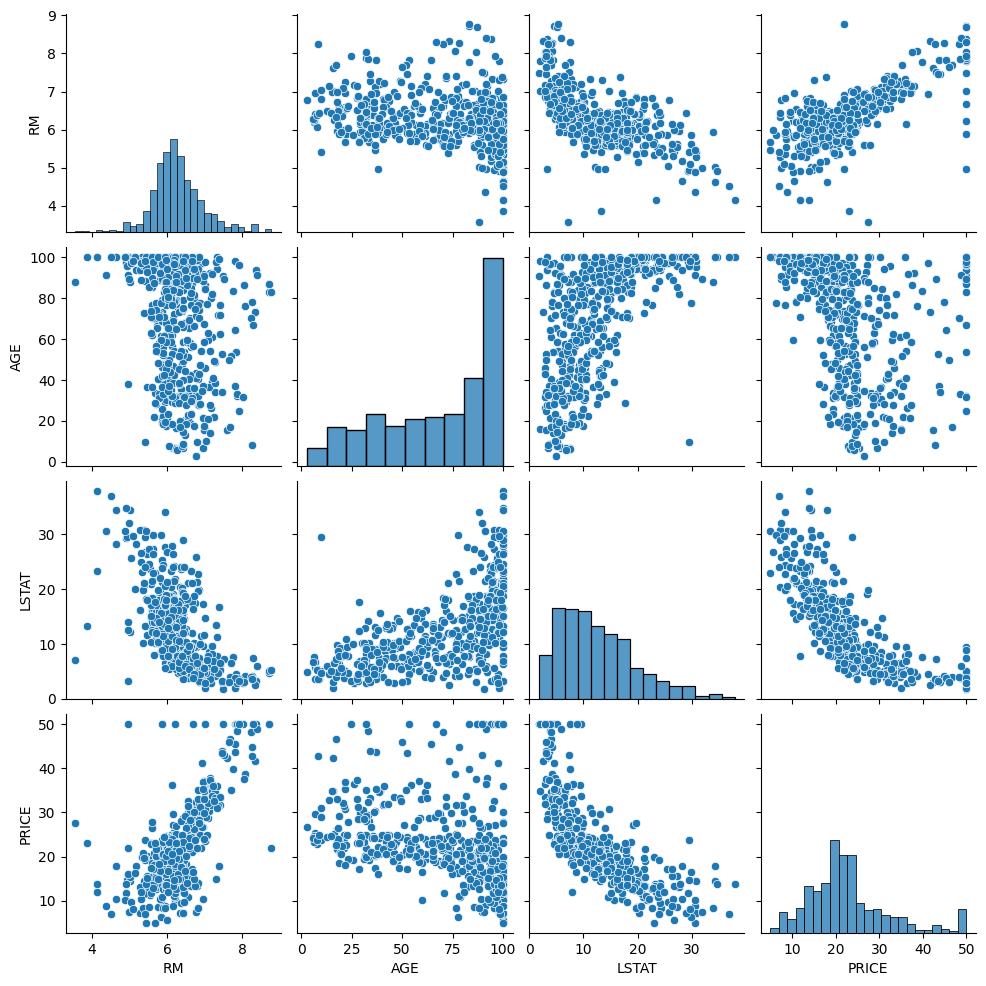

In [ ]:
features3 = ['RM','AGE','LSTAT', 'PRICE']
df_boston3 = df_boston[features3]
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

We can visually analyze the pairwise relationships in the scatter plots. The diagonal axe contains a plot to show the univariate distribution of the data for the variable in that column.

You can create the same scatter plot matrix using the scatter_matrix method in pandas.tools.plotting:

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='AGE', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='PRICE', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='AGE'>,
        <Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='LSTAT', ylabel='AGE'>,
        <Axes: xlabel='PRICE', ylabel='AGE'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='AGE', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='PRICE', ylabel='LSTAT'>],
       [<Axes: xlabel='RM', ylabel='PRICE'>,
        <Axes: xlabel='AGE', ylabel='PRICE'>,
        <Axes: xlabel='LSTAT', ylabel='PRICE'>,
        <Axes: xlabel='PRICE', ylabel='PRICE'>]], dtype=object)

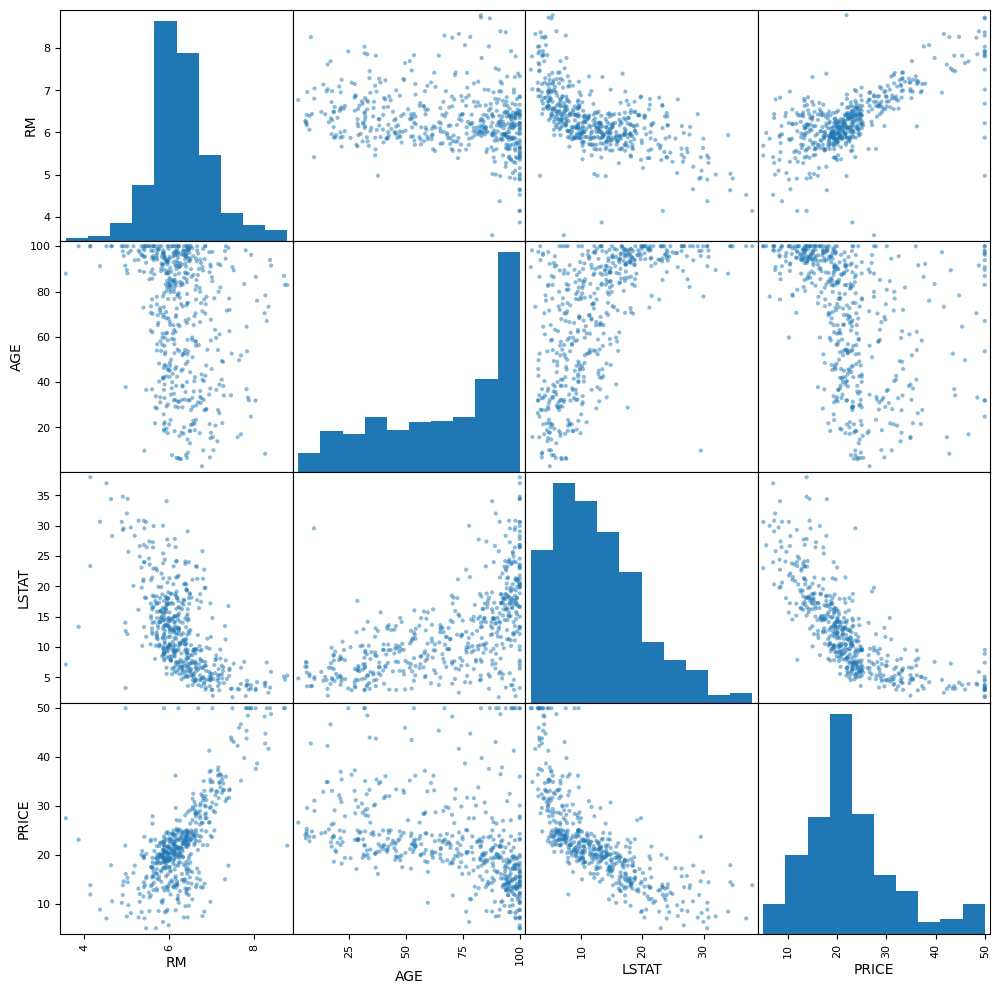

In [ ]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))

**Plots for the fitting evaluation:**

We can often learn a lot about how well our model did by analyzing the predictions and residuals with two interesting plots:
- An scatter plot of the observed values $y$ versus the predicted value $\hat y$
- An scatter plot residuals $y_i - \hat y_i$ vs. $\hat y_i$.

In both cases we can add a line to show which would be the perfect result.

Text(0, 0.5, 'Predicted price ($1000s)')

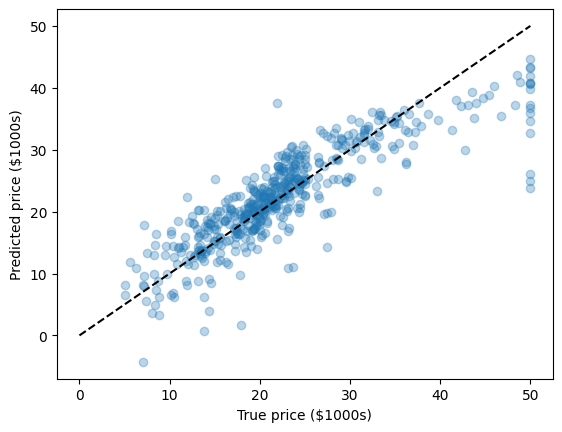

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is named 'df_boston'
X = df_boston.drop(['PRICE', 'MEDV'], axis=1)  # Select features (all columns except 'PRICE')
y = df_boston['PRICE']  # Target variable

reg = LinearRegression() # Create the Linear Regression estimator
reg.fit(X, y) # Fitting with all the features
y_pred = reg.predict(X) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0, 0.5, '$y - \\hat y$')

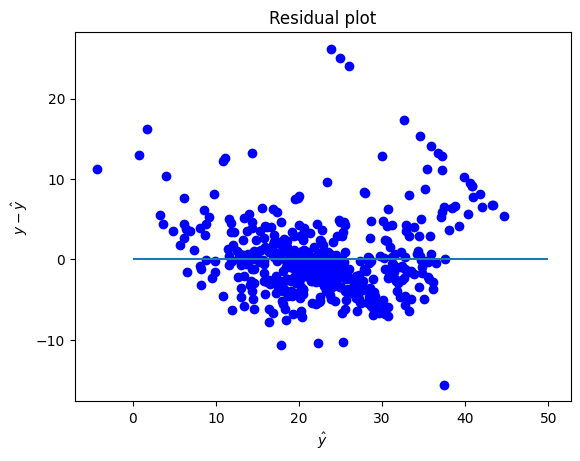

In [ ]:
x_plot = plt.scatter(y_pred, (y-y_pred), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')

Intuitively, if the model is good, then a plot of the residuals ($y_i - \hat y_i$) against the fitted values ($\hat y_i$) should look like noise (i.e., there shouldn't be any visible patterns).

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 2** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.<p>

We will divide in training and testing sets and evaluate the prediction (using sklearn) with a simple and a multiple regression model.<p>

Fill the gaps of the exercise.

</div>

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names
print(X.shape, y.shape)
print(feature_names)

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


First visualize the data. Plot a histogram of the target variable.

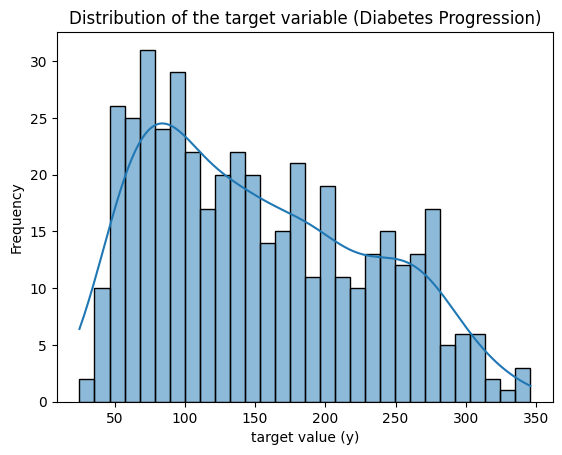

In [ ]:
# Your code here
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Histogramm
sns.histplot(data=df, x='target', bins=30, kde=True)
plt.title("Distribution of the target variable (Diabetes Progression)")
plt.xlabel("target value (y)")
plt.ylabel("Frequency")
plt.show()

Divide in training and testing sets

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("train data:", X_train.shape, y_train.shape)
print("test data:", X_test.shape, y_test.shape)

train data: (353, 10) (353,)
test data: (89, 10) (89,)


For the simple model, first choose one of the dimensions of the data. Try some plots to identify possible linear relationships between the predictor and target variables. Pick one variable for your first model.

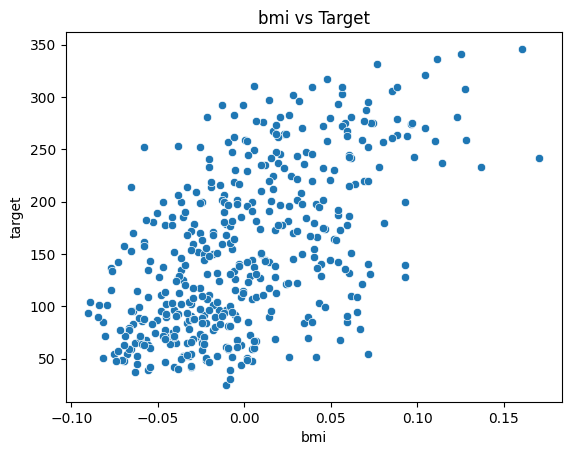

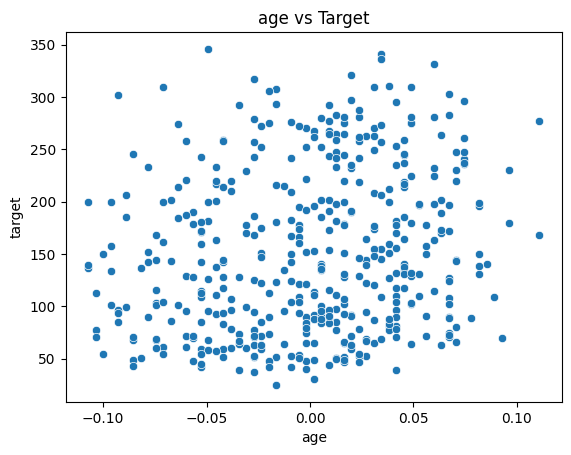

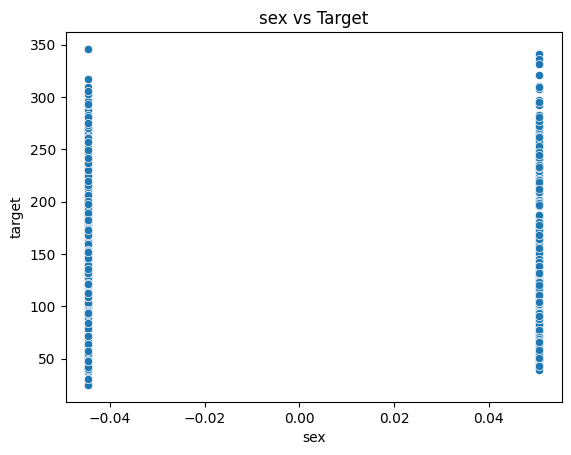

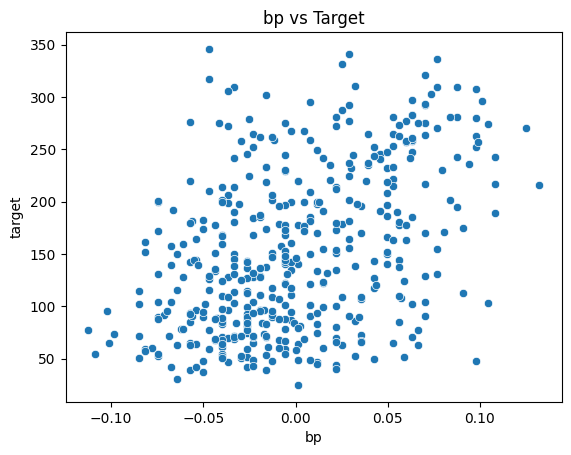

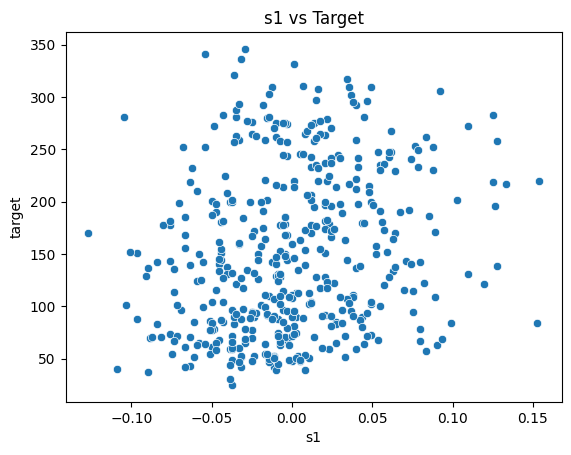

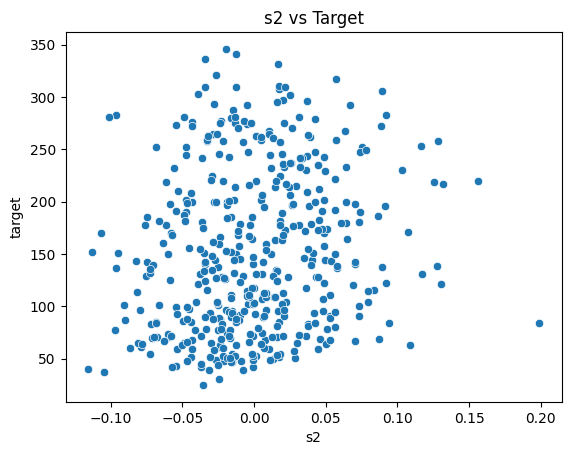

In [ ]:
# Scatterplots für ausgewählte Features
for feature in ['bmi', 'age', 'sex', 'bp', 's1', 's2']:
    sns.scatterplot(data=df, x=feature, y='target')
    plt.title(f'{feature} vs Target')
    plt.show()

Visualize the data using scatter plot (plt.scatter):

<Axes: xlabel='bp', ylabel='target'>

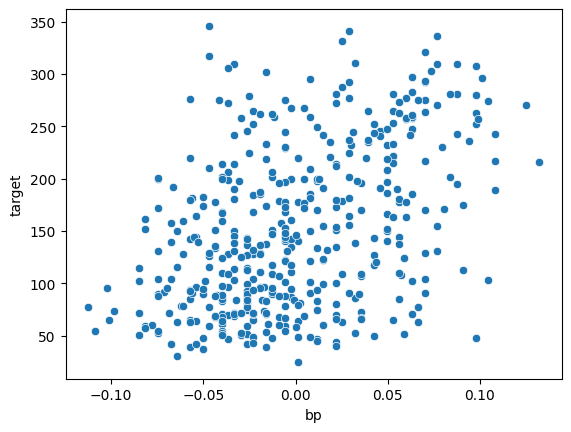

In [ ]:
sns.scatterplot(data=df, x='bp', y='target')

Visualize the data using scatter plot (plt.scatter) and two different colors for train and test data:

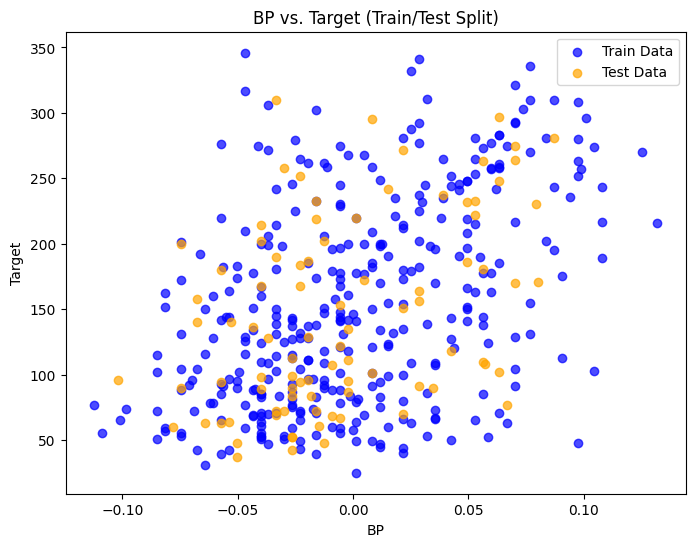

In [ ]:
# Your code here
X_feature = df[['bp']]
y_target = df['target']

# Aufteilen in Training und Test
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)
plt.scatter(X_test, y_test, color='orange', label='Test Data', alpha=0.7)
plt.xlabel('BP')
plt.ylabel('Target')
plt.title('BP vs. Target (Train/Test Split)')
plt.legend()
plt.show()

Train and evaluate the score of the test set.

In [ ]:
# Your code here
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Modell auf Testdaten evaluieren (R^2 Score)
score = model.score(X_test, y_test)
print(f"Test set R^2 score: {score:.3f}")

Test set R^2 score: 0.173


Calculate the Mean Squared Error on the train and test set:

In [ ]:
from sklearn.metrics import mean_squared_error

# predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error (Train): {mse_train:.3f}")
print(f"Mean Squared Error (Test): {mse_test:.3f}")

Mean Squared Error (Train): 4874.361
Mean Squared Error (Test): 4379.390


Visualize the predicted line together with a scatter plot of the training set.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


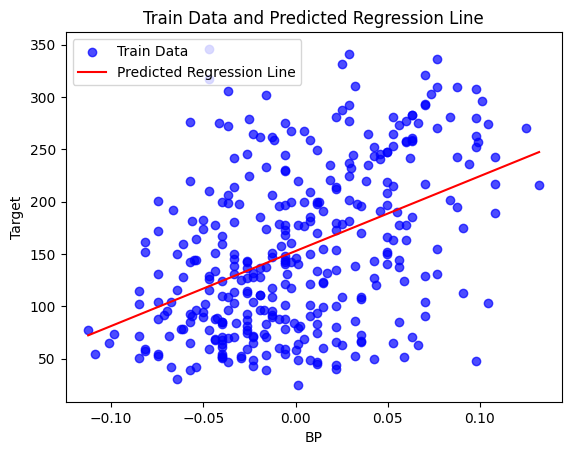

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)

# Werte für die Regressionslinie erstellen (im Bereich von X_train)
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Vorhersagen für diese Werte
y_range_pred = model.predict(X_range)

# Regressionslinie plotten
plt.plot(X_range, y_range_pred, color='red', label='Predicted Regression Line')

plt.xlabel('BP')
plt.ylabel('Target')
plt.title('Train Data and Predicted Regression Line')
plt.legend()
plt.show()

For multiple regression model divide in training and testing sets and evaluate the prediction (sklearn)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Split in Training und Test (alle Features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell initialisieren und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf Trainings- und Testdaten
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.3f}")
print(f"Test MSE: {mse_test:.3f}")
print(f"Train R^2: {r2_train:.3f}")
print(f"Test R^2: {r2_test:.3f}")

Train MSE: 2868.550
Test MSE: 2900.194
Train R^2: 0.528
Test R^2: 0.453


Is the score improving using all 10 variables?

In [ ]:
# 1. Einfaches Modell nur mit 'bp'
import numpy as np
bp_index = feature_names.index('bp')
X_bp = X[:, bp_index].reshape(-1, 1)

X_train_bp, X_test_bp, y_train, y_test = train_test_split(X_bp, y, test_size=0.2, random_state=42)
model_bp = LinearRegression()
model_bp.fit(X_train_bp, y_train)
y_test_pred_bp = model_bp.predict(X_test_bp)
r2_bp = r2_score(y_test, y_test_pred_bp)

# 2. Modell mit allen 10 Features
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
y_test_pred_all = model_all.predict(X_test_all)
r2_all = r2_score(y_test, y_test_pred_all)

print(f"R² mit nur BP: {r2_bp:.3f}")
print(f"R² mit allen 10 Features: {r2_all:.3f}")

R² mit nur BP: 0.173
R² mit allen 10 Features: 0.453


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Exercice 3: Macroeconomic Dataset**<p>
    
In the following example we will use the Longley dataset of US macroeconomic data from the R datasets website. We want to explore the relationships between the Total Derived Employment ('Employed') and the other variables.

<ul>
<li>Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the population and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the armed forces and the unemployed?</li>
<li>Can you see any non-linear effects between the armed forces and the unemployed?</li>
<li>Try to use higher order models to the fitting of GNP with Population.</li>
</ul>
    
</div>

In [3]:
import pandas as pd
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?

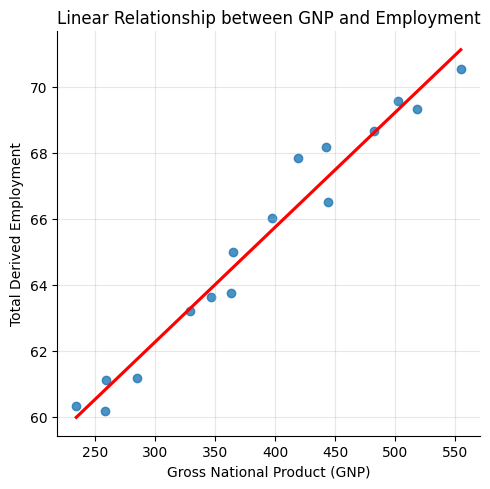

In [5]:
# Your code goes
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="GNP", y="Employed", data=df, ci=None, line_kws={'color': 'red'})

plt.title("Linear Relationship between GNP and Employment")
plt.xlabel("Gross National Product (GNP)")
plt.ylabel("Total Derived Employment")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# yes, there is a linear relationship between GNP and total derived employment.

Is there a linear relationship between the population and the Total Derived Employment ('Employed')?

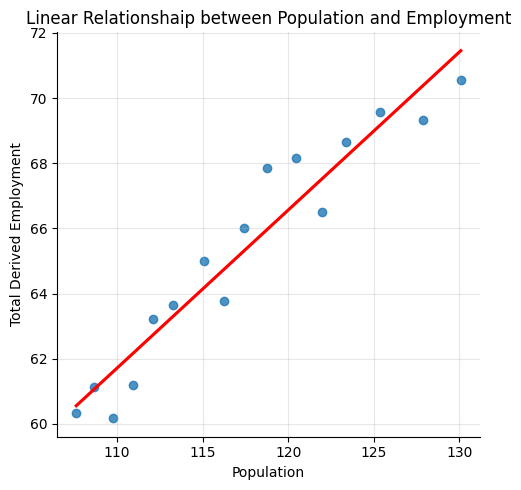

In [7]:
sns.lmplot(x="Population", y="Employed", data=df, ci=None, line_kws={'color': 'red'})

plt.title("Linear Relationshaip between Population and Employment")
plt.xlabel("Population")
plt.ylabel("Total Derived Employment")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# yes, there is a linear relationship between population and total derived employment.

Is there a linear relationship between the armed forces and the unemployed?

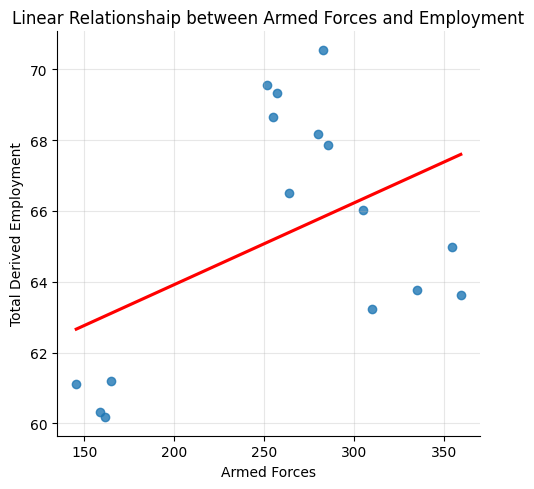

In [8]:
# Your code goes here
sns.lmplot(x="Armed.Forces", y="Employed", data=df, ci=None, line_kws={'color': 'red'})

plt.title("Linear Relationship between Armed Forces and Employment")
plt.xlabel("Armed Forces")
plt.ylabel("Total Derived Employment")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# no there is no linear relationship between armed forces and employment.

Can you see any non-linear effects between the armed forces and the unemployed?

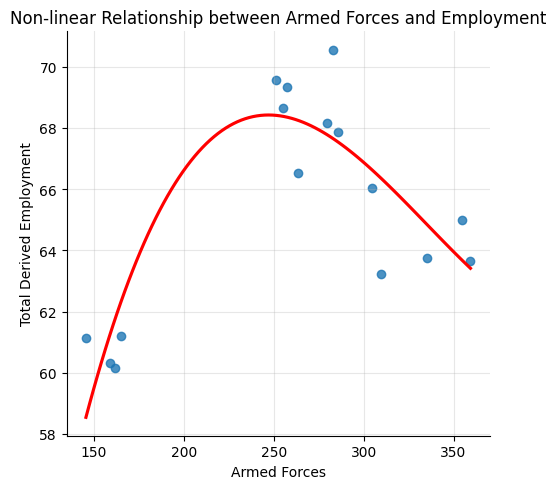

In [16]:
# Your code goes here
sns.lmplot(
    x="Armed.Forces",
    y="Employed",
    data=df,
    order=3,
    ci=None,
    line_kws={'color': 'red'}
)

plt.title("Non-linear Relationship between Armed Forces and Employment")
plt.xlabel("Armed Forces")
plt.ylabel("Total Derived Employment")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# yes, we could check for a polynomial regression of second or third order

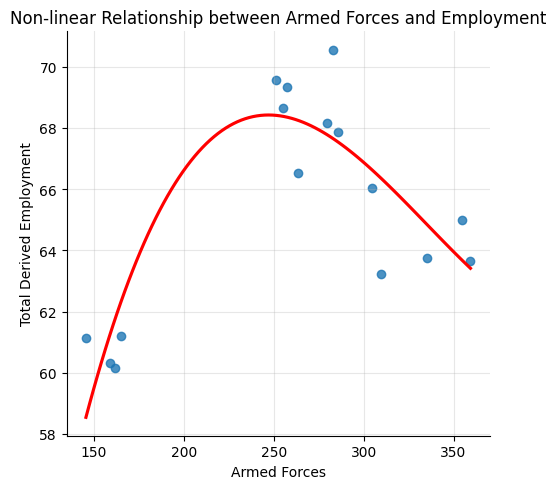

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 4: Advertising dataset**<p>


In the following example we will use the [advertising dataset](https://www.kaggle.com/purbar/advertising-data/data)which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.<p>
<ul>
    <li>Is there a linear relationship between the sales of products and the advertising budget in TV, radio or newspapers?</li>
    <li>Train a simple linear model for each variable to predict sales</li>
    <li>Train a multiple linear model to predict sales</li>
    <li>Compare the different models. Which one's performed best?</li>
</ul>

Dataset from the book: "An Introduction to Statistical Learning with Applications in R”. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.<p>


</div>

In [23]:
from google.colab import files
uplaoded = files.upload()

Saving Advertising.csv to Advertising.csv


In [25]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


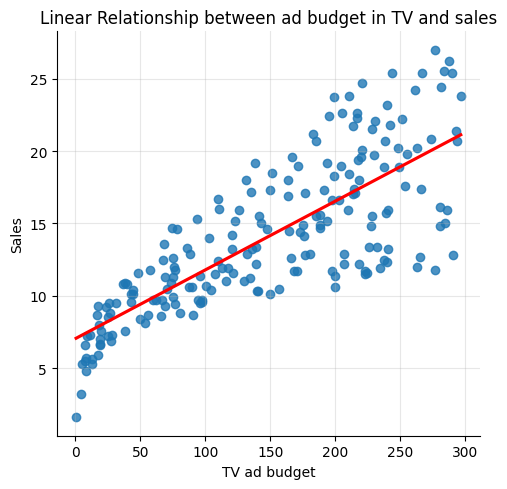

In [27]:
# Linear relationshipt between sales of products and the advertising budget in TV
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="TV", y="Sales", data=df, ci=None, line_kws={'color': 'red'})

plt.title("Linear Relationship between ad budget in TV and sales")
plt.xlabel("TV ad budget")
plt.ylabel("Sales")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# yes, there is a linear relationship between ad budget in TV and Sales

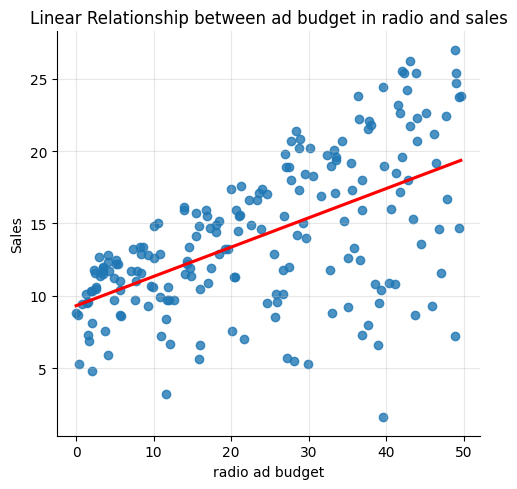

In [28]:
# Linear relationshipt between sales of products and the advertising budget in radio
sns.lmplot(x="Radio", y="Sales", data=df, ci=None, line_kws={'color': 'red'})

plt.title("Linear Relationship between ad budget in radio and sales")
plt.xlabel("radio ad budget")
plt.ylabel("Sales")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# not really a linear relationship

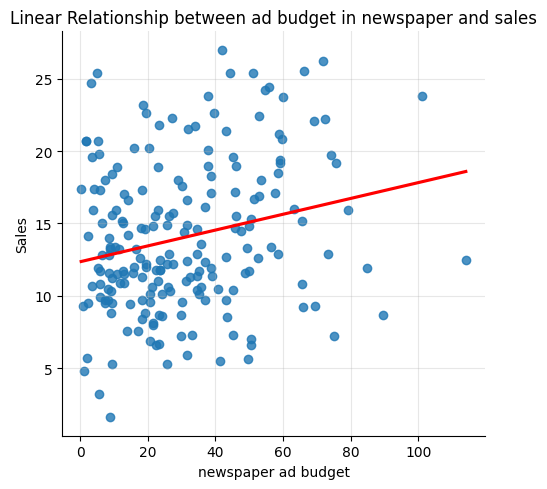

In [29]:
# Linear relationshipt between sales of products and the advertising budget in newspaper

plt.title("Linear Relationship between ad budget in newspaper and sales")
plt.xlabel("newspaper ad budget")
plt.ylabel("Sales")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# not really a linear relationship

In [36]:
# Target variable
target = 'Sales'

# Separate features
features = [col for col in df.columns if col != target]

# Train a simple linear model for each feature
for feature in features:
    X = df[[feature]]
    y = df[target]

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    print(f"Feature: {feature}")
    print(f"  Coefficient: {model.coef_[0]:.4f}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  R^2 Score: {r2:.4f}")
    print("-" * 30)

Feature: Unnamed: 0
  Coefficient: -0.0020
  Intercept: 14.2952
  R^2 Score: 0.0011
------------------------------
Feature: TV
  Coefficient: 0.0465
  Intercept: 7.1196
  R^2 Score: 0.6767
------------------------------
Feature: Radio
  Coefficient: 0.2044
  Intercept: 9.4241
  R^2 Score: 0.2634
------------------------------
Feature: Newspaper
  Coefficient: 0.0598
  Intercept: 12.3105
  R^2 Score: 0.0299
------------------------------


In [40]:
# muliple regression model
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(columns='Sales')
y = df['Sales']

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersage machen
y_pred = model.predict(X_test)

# Modellbewertung
r2 = r2_score(y_test, y_pred)

# Ergebnisse anzeigen
print("R² (Testdaten):", round(r2, 4))

# Optional: Koeffizienten anzeigen
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

R² (Testdaten): 0.8986
      Feature  Coefficient
0  Unnamed: 0     0.000644
1          TV     0.044718
2       Radio     0.189251
3   Newspaper     0.003046


In [ ]:
# Concluson: The R² is higher in the multiple regression model as in each of the linear regression models itself. Thus, the multiple regression model seems to describe the data best.